In [1]:
import numpy as np
import pandas as pd

%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

from pandas_profiling import ProfileReport

In [2]:
df = pd.read_csv('/Users/kimginam/Downloads/Telco_Customer_Churn.csv')

In [3]:
male = df[df['gender'] == 'Male']
female = df[df['gender'] == 'Female']

In [4]:
low_tenure = df[df['tenure'] <= 35]
high_tenure = df[df['tenure'] >= 35]

In [5]:
churn = df[df['Churn'] == 'Yes']
not_churn = df[df['Churn'] == 'No']

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


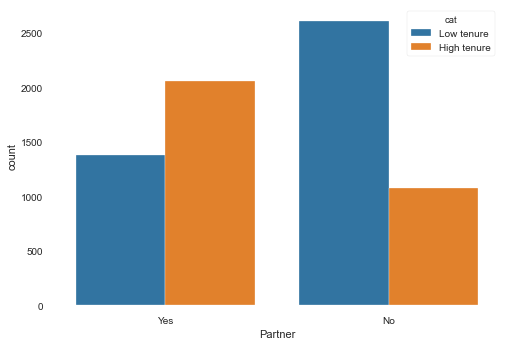

In [6]:
low_tenure['cat'] = 'Low tenure'
high_tenure['cat'] = 'High tenure'
df_combined = pd.concat([low_tenure, high_tenure])
sns.countplot(x='Partner', hue='cat', data=df_combined)

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


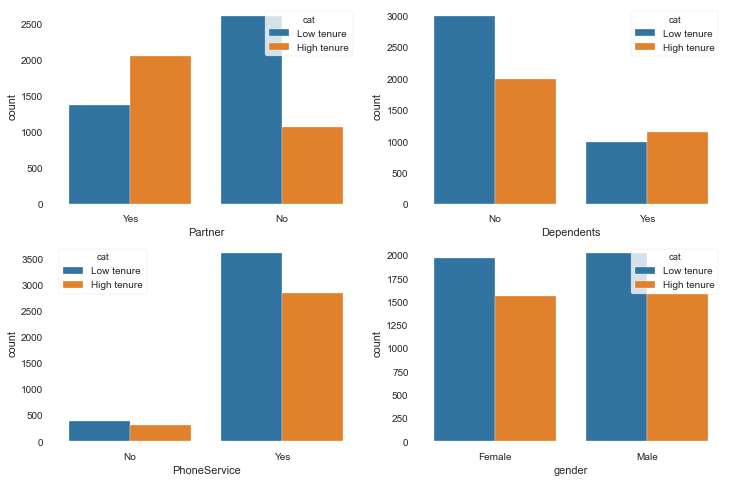

In [7]:
low_tenure['cat'] = 'Low tenure'
high_tenure['cat'] = 'High tenure'
df_combined = pd.concat([low_tenure, high_tenure])

fig, ((ax1,ax2), (ax3,ax4)) = plt.subplots(nrows=2, ncols=2)
fig.set_size_inches(12,8)

sns.countplot(x="Partner", hue='cat', data=df_combined, ax=ax1)

sns.countplot(x="Dependents", hue='cat', data=df_combined, ax=ax2)

sns.countplot(x="PhoneService", hue='cat', data=df_combined, ax=ax3)

sns.countplot(x="gender", hue='cat', data=df_combined, ax=ax4)


plt.show()

In [8]:
categorical_cols = [c for c in df.columns if df[c].dtype == 'object'
                    or c == 'SeniorCitizen']
df_categorical = df[categorical_cols].copy()
for col in categorical_cols:
    if df_categorical[col].nunique() == 2:
        df_categorical[col], _ = pd.factorize(df_categorical[col])
    else:
        df_categorical = pd.get_dummies(df_categorical, columns=[col])

df_categorical.head(3)

,gender,SeniorCitizen,Partner,Dependents,PhoneService,PaperlessBilling,Churn,customerID_0002-ORFBO,customerID_0003-MKNFE,customerID_0004-TLHLJ,...,TotalCharges_995.35,TotalCharges_996.45,TotalCharges_996.85,TotalCharges_996.95,TotalCharges_997.65,TotalCharges_997.75,TotalCharges_998.1,TotalCharges_999.45,TotalCharges_999.8,TotalCharges_999.9
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,1,0,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,1,0,1,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [9]:
df_categorical

,gender,SeniorCitizen,Partner,Dependents,PhoneService,PaperlessBilling,Churn,customerID_0002-ORFBO,customerID_0003-MKNFE,customerID_0004-TLHLJ,...,TotalCharges_995.35,TotalCharges_996.45,TotalCharges_996.85,TotalCharges_996.95,TotalCharges_997.65,TotalCharges_997.75,TotalCharges_998.1,TotalCharges_999.45,TotalCharges_999.8,TotalCharges_999.9
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,1,0,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,1,0,1,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,1,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,1,0,1,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,1,0,0,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7039,0,0,0,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7040,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7041,1,1,0,0,1,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
